In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/train.zip
/kaggle/input/nyc-taxi-trip-duration/test.zip
/kaggle/input/nyc-taxi-trip-duration/sample_submission.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🔃 Data Loading and Extraction

In [3]:
from pathlib import Path
from zipfile import ZipFile

In [4]:
# paths for the dataset
train_path = '/kaggle/input/nyc-taxi-trip-duration/train.zip'
test_path = '/kaggle/input/nyc-taxi-trip-duration/test.zip'

In [5]:
# output path for the zip files
def extract_zip_file(filepath):
    output_path = Path('/kaggle/working/') / 'raw'
    output_path.mkdir(parents=True,exist_ok=True)
    with ZipFile(file=filepath) as f:
        f.extractall(path=output_path)  
        
# extract the train file
extract_zip_file(train_path)

# extract the test file
extract_zip_file(test_path)

In [6]:
# read the csv files
train_df = pd.read_csv('/kaggle/working/raw/train.csv')
test_df = pd.read_csv('/kaggle/working/raw/test.csv')

print(f'The shape of train file is {train_df.shape}')
print(f'The shape of train file is {test_df.shape}')

The shape of train file is (1458644, 11)
The shape of train file is (625134, 9)


**Data Shape**
- The Train Data has around 1.4 million rows and 11 columns.
- The Test Data has around 625k rows and 9 columns.

# Understanding the Data

In [7]:
train_df.sample(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1080014,id1185451,2,2016-03-17 08:35:43,2016-03-17 08:42:45,1,-73.989899,40.757027,-73.985085,40.751877,N,422
198410,id1830791,1,2016-01-05 18:59:35,2016-01-05 19:14:36,1,-73.874542,40.774151,-73.974136,40.750305,N,901
206379,id1206313,1,2016-01-01 13:00:02,2016-01-01 13:08:51,1,-73.979889,40.745590,-74.000732,40.730824,N,529
23278,id3141311,1,2016-04-14 01:21:37,2016-04-14 01:38:08,1,-74.005585,40.742020,-73.951920,40.812908,N,991
602535,id1054869,1,2016-03-30 05:38:05,2016-03-30 05:43:43,1,-73.947197,40.779873,-73.961395,40.764591,N,338
1234367,id0487256,1,2016-06-07 11:13:23,2016-06-07 11:33:48,1,-73.978355,40.753471,-73.972023,40.757179,N,1225
847474,id1132396,2,2016-01-30 15:00:55,2016-01-30 15:16:35,5,-73.982521,40.771641,-73.991463,40.750118,N,940
69667,id0819395,2,2016-05-01 20:18:46,2016-05-01 20:25:16,5,-73.995750,40.745777,-73.992607,40.755898,N,390
1342798,id2122862,2,2016-05-12 00:52:03,2016-05-12 01:09:53,1,-73.986183,40.730492,-73.987038,40.671230,N,1070
843937,id0677366,2,2016-03-08 18:18:34,2016-03-08 18:23:18,1,-73.980400,40.782639,-73.982460,40.772579,N,284


**About the columns** 💻:
1. **id** - Starts with id and then a bunch of random numbers(7 to be exact).
2. **vendor_id** - Integer column and categorical.
3. **pickup_datetime** - Fmt YYYY-MM-DD HH:MM:SS
4. **dropoff_datetime** - Fmt YYYY-MM-DD HH:MM:SS
5. **passenger_count** - Integer column
6. **pickup_longitude/latitude** - longitude is negative and latitude is positive(above Tropic of Cancer).
7. **dropoff_longitude/latitude** - longitude is negative and latitude is positive(above Tropic of Cancer).
8. **store_and_fwd_flagstore_and_fwd_flag** - String categorical - `Has to be encoded`.
9. **trip_duration** - in seconds

In [8]:
# check for missing values

# train_df
train_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
# check for the test data
test_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

In [10]:
# columns to run describe on

cols_to_describe_num = train_df.columns[[5,6,7,8,10]]

cols_to_describe_num

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [11]:
# description about the data

train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<div style="background-color:#F0B27A ; padding: 20px;">

<span style="font-size: 18px;">
    
**Some Geography Facts**         
Latitude and longitude are a pair of numbers that describe a position on a geographic coordinate system. They are measured in decimal degrees and range from **\[-90 to 90] for latitude** and **\[-180 to 180] for longitude**.
</span>
</div>

In [12]:
train_df[cols_to_describe_num].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<div style="background-color: #E6E6FA; padding: 10px;">
    
**About the columns**
- **pickup_longitude** - -121.9(min) and -61.33(max) value are way off the borders of NYC city. The median longitude value is around the -73.9 mark which seems fine. (The -ve sign is correct as NYC lies on the west of the meridian line)
- **pickup_latitude** - The maximum value here which is 51.88 seems to be concerning.(The +ve sign for all values is ok as NYC lies above the equator mark).
- **dropoff_longitude** - 121.9(min) and -61.33(max) value are way off the borders of NYC city. The median longitude value is around the -73.9 mark which seems fine. (The -ve sign is correct as NYC lies on the west of the meridian line).
    - check whether the minimum and maximum are from the same entry for both the pickup and drop. This can indicate a faulty device showing the same coordinates every time.
- **dropoff latitude** - The min value of 32.181 is of concern.

**Target Column** (trip_duration)
- The mean duration is 959 sec and the median is 662 sec. This indicates the column is skewed to the right. (Mean > Median).
- This also indicates the presence of outliers in the data that are skewing the distribution.
- The minimum trip duration value is 1 sec which indicates ride cancelled by the rider or rejected by the driver, after the taxi reached the pickup spot.
- The maximum trip duration of 980 minutes or around 41 days is definitely an outlier and should be handled.
- The Q3 of the data is around 17-18 minutes which shows that people in NYC prefer shorter cab trips.
    
</div>

In [13]:
(1.075000e+03 * 60) / 3600

17.916666666666668

**Points to Ponder**:
Check the minimum and maximum values of latitude and longitude and check whether they are outliers?
- Check the extreme longitude and latitude values.
- Trip timings for one booking is around 41 days -- An Outlier.

In [14]:
# statistical summary for the categorical columns

cols_to_describe_cat = [col for col in train_df.columns if col not in cols_to_describe_num]
cols_to_describe_cat = np.array(cols_to_describe_cat)[[1,4,5]]
cols_to_describe_cat

array(['vendor_id', 'passenger_count', 'store_and_fwd_flag'], dtype='<U18')

In [15]:
# value counts of each categorical column 

for col in cols_to_describe_cat:
    print(f'The unique value in {col} are ---->',np.sort(train_df[col].unique()))
    print(train_df[col].value_counts())
    print('*' * 100,end='\n')

The unique value in vendor_id are ----> [1 2]
vendor_id
2    780302
1    678342
Name: count, dtype: int64
****************************************************************************************************
The unique value in passenger_count are ----> [0 1 2 3 4 5 6 7 8 9]
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
****************************************************************************************************
The unique value in store_and_fwd_flag are ----> ['N' 'Y']
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64
****************************************************************************************************


In [16]:
# datatypes of train data

train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [17]:
# info about the data frame

train_df.info(memory_usage='deep',show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   vendor_id           int64  
 2   pickup_datetime     object 
 3   dropoff_datetime    object 
 4   passenger_count     int64  
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   dropoff_longitude   float64
 8   dropoff_latitude    float64
 9   store_and_fwd_flag  object 
 10  trip_duration       int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 461.8 MB


**The memory usage is 461.8 MB**

In [18]:
# convert the big sized integer columns to small size

train_df['vendor_id'] = train_df['vendor_id'].astype(np.int8)
train_df['passenger_count'] = train_df['vendor_id'].astype(np.int16)

In [19]:
train_df.info(memory_usage='deep',show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   vendor_id           int8   
 2   pickup_datetime     object 
 3   dropoff_datetime    object 
 4   passenger_count     int16  
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   dropoff_longitude   float64
 8   dropoff_latitude    float64
 9   store_and_fwd_flag  object 
 10  trip_duration       int64  
dtypes: float64(4), int16(1), int64(1), int8(1), object(4)
memory usage: 443.8 MB


**Convert data types**
1. id - remove 'id' and make it numerical.
2. pickup_datetime - change to datetime
3. dropoff_datetime - change to datetime

# EDA(Exploratory Data Analysis)

In [20]:
# train_df columns
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

## id

In [21]:
train_df['id'].head()

0    id2875421
1    id2377394
2    id3858529
3    id3504673
4    id2181028
Name: id, dtype: object

In [22]:
# remove the id tag from all the rows

def remove_id_tag(data):
    data['id'] = data['id'].str.replace('id','')
    return data['id']

# remove tag from train data
remove_id_tag(train_df)

0          2875421
1          2377394
2          3858529
3          3504673
4          2181028
            ...   
1458639    2376096
1458640    1049543
1458641    2304944
1458642    2714485
1458643    1209952
Name: id, Length: 1458644, dtype: object

In [23]:
# remove tag from test data
remove_id_tag(test_df)

0         3004672
1         3505355
2         1217141
3         2150126
4         1598245
           ...   
625129    3008929
625130    3700764
625131    2568735
625132    1384355
625133    0621643
Name: id, Length: 625134, dtype: object

In [24]:
# convert the id column to integer
train_df['id'] = train_df['id'].astype('int')
test_df['id'] = test_df['id'].astype('int')

In [25]:
# test if id column is required

def test_id_column(data):
    if data.shape[0] == data['id'].nunique():
        new_data = data.drop(columns='id')
        return new_data
    else:
        return data
    
train_df_new = test_id_column(train_df)
test_df_new = test_id_column(test_df)

In [26]:
train_df_new

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,2,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,2,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,2,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,2,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,2,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,2,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


## vendor_id

In [27]:
# categories in the vendor id column

train_df_new['vendor_id'].value_counts().sort_index()

vendor_id
1    678342
2    780302
Name: count, dtype: int64

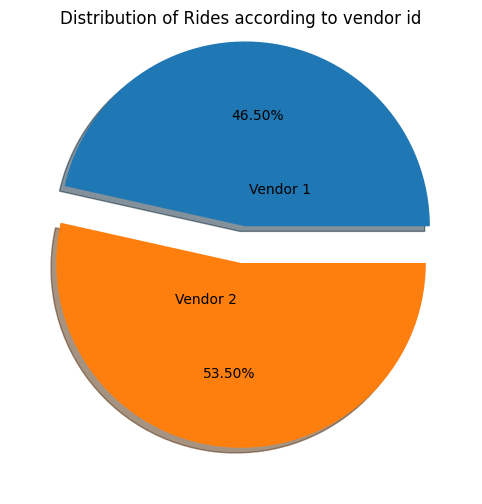

In [28]:
# pie chart showing distribution
fig = plt.figure(figsize=(12,6))
plt.pie(train_df_new['vendor_id'].value_counts().sort_index(),autopct='%.2f%%',
        explode=[0.2,0],shadow=True,labels=['Vendor 1','Vendor 2'],labeldistance=0.2)
plt.title('Distribution of Rides according to vendor id')
plt.show()

- People are more likely to select vendor 2 for its services as compared to vendor 1.

## pickup datetime

In [29]:
# change the column to datetime
train_df_new['pickup_datetime'] = pd.to_datetime(train_df_new['pickup_datetime'])
test_df_new['pickup_datetime'] = pd.to_datetime(test_df_new['pickup_datetime'])

In [30]:
train_df_new.shape

(1458644, 10)

In [31]:
train_df_new['pickup_datetime'].dt.weekday

0          0
1          6
2          1
3          2
4          5
          ..
1458639    4
1458640    6
1458641    4
1458642    1
1458643    1
Name: pickup_datetime, Length: 1458644, dtype: int32

In [32]:
# feature extraction

def make_datetime_features(data,column_type):
    data[f'{column_type}_hour'] = data[f'{column_type}_datetime'].dt.hour 
    data[f'{column_type}_date'] = data[f'{column_type}_datetime'].dt.day
    data[f'{column_type}_month'] = data[f'{column_type}_datetime'].dt.month
    data[f'{column_type}_day'] = data[f'{column_type}_datetime'].dt.weekday
    data[f'is_weekend'] = data.apply(lambda row: row[f'{column_type}_day'] >= 5,axis=1).astype('int')
    return data

In [33]:
# datetime features for pickup column in train data 
make_datetime_features(train_df_new,'pickup')
# datetime features for pickup column in test data
make_datetime_features(test_df_new,'pickup')

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,23,30,6,3,0
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,23,30,6,3,0
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,23,30,6,3,0
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,23,30,6,3,0
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,23,30,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N,0,1,1,4,0
625130,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N,0,1,1,4,0
625131,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N,0,1,1,4,0
625132,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N,0,1,1,4,0


In [34]:
train_df_new.shape

(1458644, 15)

In [35]:
train_df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_date,pickup_month,pickup_day,is_weekend
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,2,-73.982155,40.767937,-73.964630,40.765602,N,455,17,14,3,0,0
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,12,6,6,1
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,2,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,19,1,1,0
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,2,-74.010040,40.719971,-74.012268,40.706718,N,429,19,6,4,2,0
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,2,-73.973053,40.793209,-73.972923,40.782520,N,435,13,26,3,5,1


In [36]:
# save the data 
# make the directory as datetime
save_path = Path('/kaggle/working/') / 'datetime'
save_path.mkdir(parents=True,exist_ok=True)

# save the train file
train_df_new.to_csv(save_path / 'train.csv')

# save the test file
test_df_new.to_csv(save_path / 'test.csv')

## EDA on the Datetime Columns

In [37]:
# time range for the train data

train_df_new['pickup_datetime'].max() - train_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:22')

**The time range shows that we have the data for 6 months**

In [38]:
# time range for the test data

train_df_new['pickup_datetime'].max() - train_df_new['pickup_datetime'].min() 

Timedelta('181 days 23:59:22')

In [39]:
# time range for the train and test data

data_temp = {'Opening_date':[train_df_new['pickup_datetime'].min(),test_df_new['pickup_datetime'].min()],
            'Closing_date':[train_df_new['pickup_datetime'].max(),test_df_new['pickup_datetime'].max()]}

pd.DataFrame(data=data_temp,index=['train','test']).T

,train,test
Opening_date,2016-01-01 00:00:17,2016-01-01 00:00:22
Closing_date,2016-06-30 23:59:39,2016-06-30 23:59:58


This shows that both the train and the test data have ranges from the same dates i.e. from **(Jan 1st, 2016)** till **(June 30th, 2016)**.

In [40]:
# total pickups each day

train_df_new['pickup_datetime'].dt.date \
.value_counts() \
.sort_index()

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
              ... 
2016-06-26    7084
2016-06-27    7311
2016-06-28    7253
2016-06-29    7623
2016-06-30    7588
Name: count, Length: 182, dtype: int64

**Idea behind this code**:


I needed to find out the pickup pattern of passengers on a particular date in line plots for both the train and test data.   
To do this:  
1. Calculated the value counts(count of rows) for each date, which will give me the total no. of pickups in the data for that particular date.
2. Then I sorted the index to reorder the data in correct chronological order.

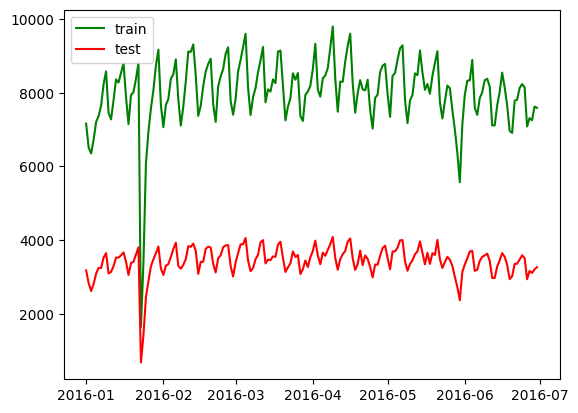

In [41]:
# pickup patterns for train and test data

plt.plot(train_df_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='green',label='train')
plt.plot(test_df_new['pickup_datetime'].dt.date.value_counts().sort_index(),color='red',label='test')
plt.legend()
plt.show()

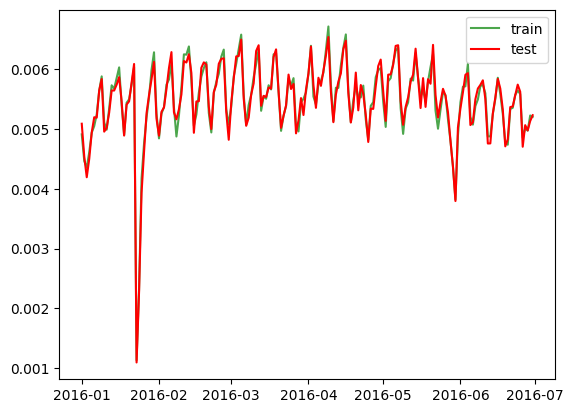

In [42]:
# pickup patterns for train and test data (results normalized)

plt.plot(train_df_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='green',alpha=0.7,label='train')
plt.plot(test_df_new['pickup_datetime'].dt.date.value_counts(normalize=True).sort_index(),color='red',label='test')
plt.legend()
plt.show()

This graph clearly indicates that the pickup patterns for the train and test data are almost similar.

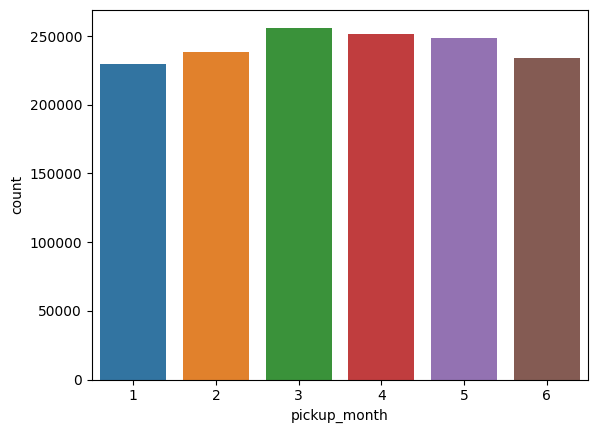

In [43]:
# count of total pickups each month

sns.countplot(data=train_df_new,x='pickup_month')
plt.show()

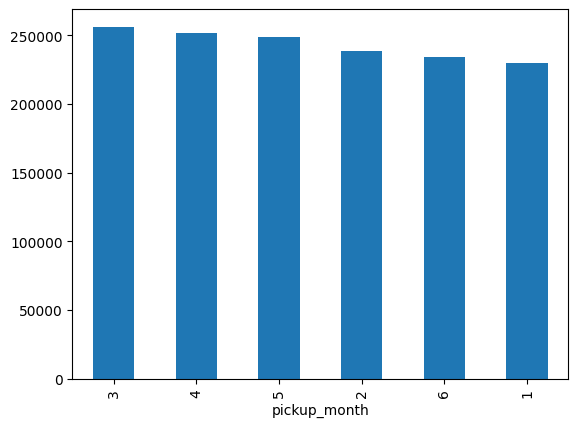

In [44]:
# pickups month wise in sorted order

train_df_new['pickup_month'] \
.value_counts() \
.sort_values(ascending=False)\
.plot(kind='bar')

plt.show()

- Less Number of pickups in the month of January can be related to weather events like snow, heavy blizzards or festive season.
- The other reason is that during festive season can drivers in New York expect heavier tips from the passengers, so passengers try to avoid taking can services and only take when required.

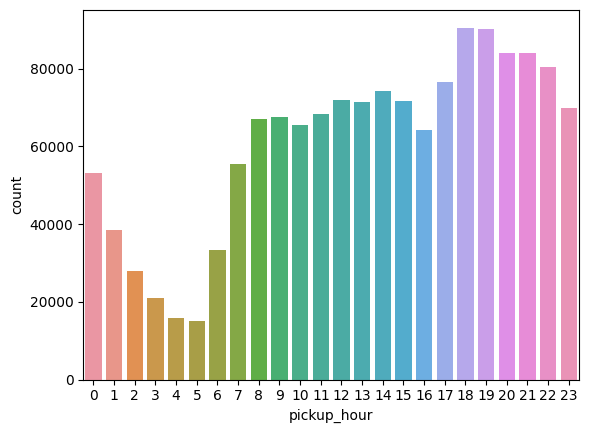

In [45]:
# rush hours for taxi pickups

sns.countplot(data=train_df_new,x='pickup_hour')
plt.show()

**Things to note**:
1. Cab pickups reduce after midnight and pickup pace after daybreak around 6am.
2. Pickups reach peak at 8am and then stabilize till 3pm.
3. Again the pickups gain strength around 6pm till 10pm at night

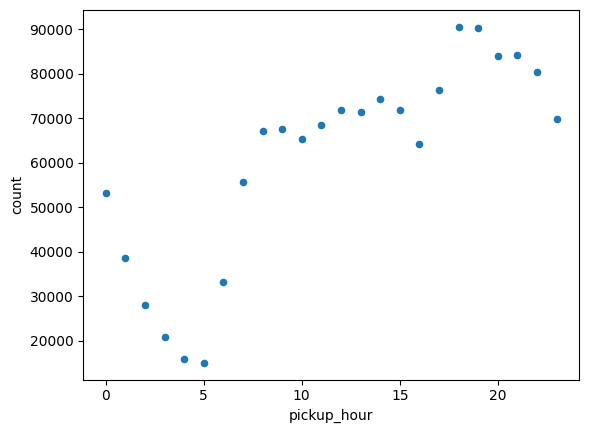

In [46]:
# rush hours divided into 3 clusters. (high rush, avg rush, low rush)

cluster_input = train_df_new['pickup_hour'] \
.value_counts() \
.sort_index() \
.reset_index()

cluster_input.plot(x='pickup_hour',y='count',kind='scatter')

plt.show()

#### Agglomerative Clustering

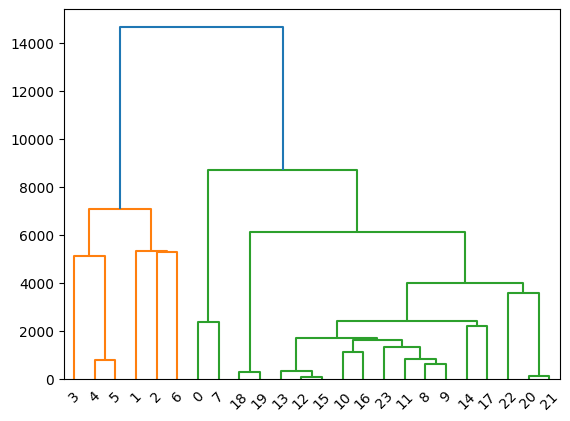

In [47]:
# plot the dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage

clustering = linkage(y=cluster_input.values,method='single')

dendrogram(clustering)
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering, KMeans

agglo = AgglomerativeClustering(n_clusters=2,linkage='single',
                                metric='euclidean')

agglo

AgglomerativeClustering(linkage='single', metric='euclidean')

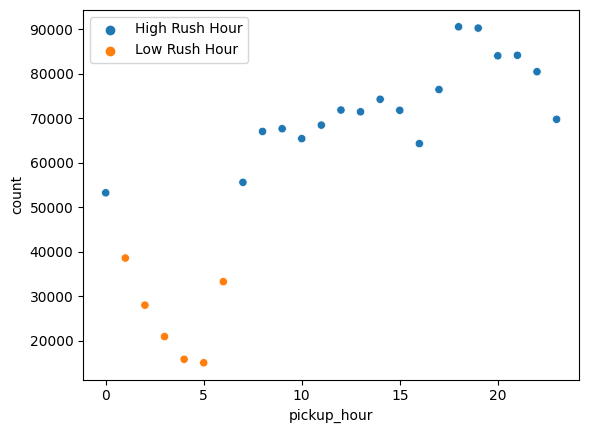

In [49]:
# plot the clusters
predictions = agglo.fit_predict(cluster_input)
sns.scatterplot(data=cluster_input,
                x='pickup_hour',y='count',
                hue=np.where(predictions == 0,'High Rush Hour','Low Rush Hour'))
plt.show()

#### KMeans Clustering

In [50]:
from sklearn.metrics import silhouette_score

The silhouette score for 2 clusters is 0.730999345100762
The silhouette score for 3 clusters is 0.6041879661284338
The silhouette score for 4 clusters is 0.6015263924638993
The silhouette score for 5 clusters is 0.643595821618139
The silhouette score for 6 clusters is 0.5882506032665346


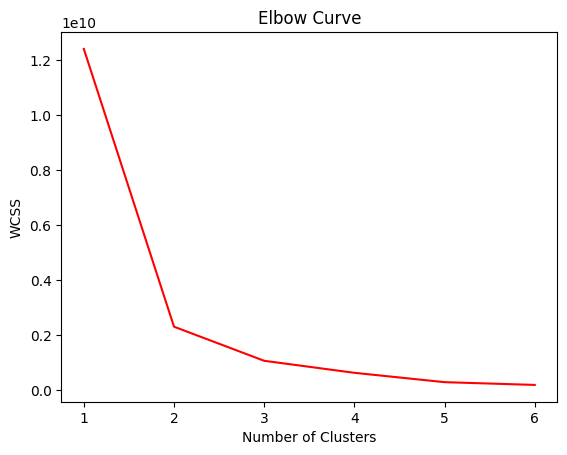

In [51]:
# elbow plot for the clusters along with silhouette score

n_clusters= [1,2,3,4,5,6]
inertia_kmeans = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n,n_init=10,max_iter=50)
    # fit on the data
    predictions = kmeans.fit_predict(cluster_input)
    # append the wcss in the list
    inertia_kmeans.append(kmeans.inertia_)
    # calculate the silhouette score
    if n < 2:
        continue
    else:
        score = silhouette_score(X=cluster_input,labels=predictions)
        print(f'The silhouette score for {n} clusters is {score}')
    
# plot the elcow curve
plt.plot(n_clusters,inertia_kmeans,color='red')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [52]:
# train kmeans for 2 clusters

kmeans = KMeans(n_clusters=2,n_init=10,max_iter=50)

# get the predictions
predictions = kmeans.fit_predict(cluster_input)

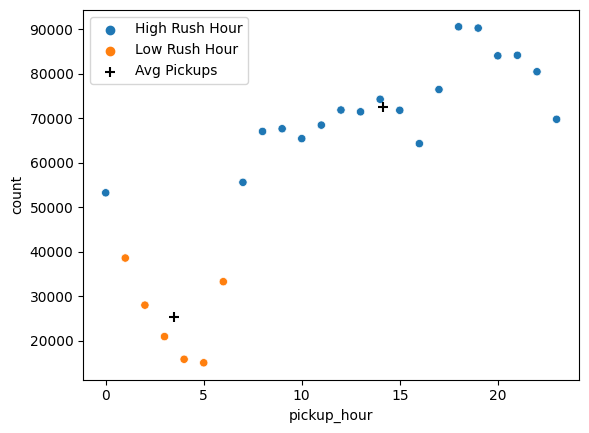

In [53]:
# get the centroids and plot on the curve
cluster_centroids = kmeans.cluster_centers_
# plot the scatter plot
sns.scatterplot(data=cluster_input,
                x='pickup_hour',y='count',
                hue=np.where(predictions == 0,'High Rush Hour','Low Rush Hour'))
#plt.scatter(cluster_input['pickup_hour'],cluster_input['count'],c=predictions)
# plot the cluster centroids
plt.scatter(cluster_centroids[:,0],cluster_centroids[:,1],marker='+',s=60,c='k',label='Avg Pickups')
plt.legend()
plt.show()

**Things to do**
1. Calculate the avg pickups for both clusters and and then take the avg of that as well.
2. Plot the value in the graph and see the results.